### Analyse italy-earthquakes from from 2016-08-24 to 2016-11-30

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startvis import *
from Starts.startmodskl import *
from Starts.startvis import *
from Starts.startmodtf import *
%matplotlib inline


local_kwargs {'data_path': './data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv, ./data/clustered_italy_earthquakes_from_2016-08-24_to_2016-11-30.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


Using TensorFlow backend.


In [2]:
nonan_data=data[1]
# test_data = StartML.convert_time_series(test_data, 'Time')
data = nonan_data.drop(['Time'], axis=1)
data.head()

,Latitude,Longitude,Depth/Km,Magnitude,Clusters
0,42.6983,13.2335,8.1,6.0,3
1,42.7123,13.2533,9.0,4.5,3
2,42.7647,13.1723,9.7,3.8,3
3,42.7803,13.1683,9.7,3.9,3
4,42.7798,13.1575,9.7,3.6,3


In [3]:
# init data with target_label = Clusters
stf = StartModTF(data, label=['Clusters'])
stf

In [4]:
stf.info_parameters()


Hidden_units: [10, 10] 

Optimizer: Adagrad 

Activation_function: relu 

Learning_Rate: 0.001 

Training_Steps: 1000 

Batch_Size: 10 

Number_of_epochs: 1 

Feature_Scaling: False 

Loss_function: mean_squared_error 

Drop_out: 0.2 

Recurrent_drop_out: 0.2 



In [5]:
# classify data based on label = 'Clusters' and save the results into y_pred and compute accuracy of model
classifier, y_true, y_pred = stf.classifier_estimator(model_lin=True)
classifier

4
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzy7f7se7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2ea9641470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzy7f7se7/model.ckpt.
INFO:tensorflow:loss = 13.

In [6]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       764
          1       1.00      1.00      1.00       253
          2       0.94      1.00      0.97       518
          3       1.00      0.58      0.73        83

avg / total       0.98      0.98      0.98      1618

Confusion Matrix: 
 [[764   0   0   0]
 [  0 253   0   0]
 [  0   0 518   0]
 [  0   0  35  48]]

Mean_Squared_Error: 
 0.0216316440049

Accuracy Score: 
 0.978368355995
set average

Precision Score: 
 0.978368355995

Recall Score: 
 0.978368355995

F-Score: 
 0.978368355995


In [11]:
# Update parameters (increase number of units)
input_dim = len(nonan_data.columns)
new_param={'hidden_units':[input_dim,10,10,1], 'optimizer':'Adam', 'activation_fn':'sigmoid', 'learning_rate': 0.0001,
           'steps':5000, 'batch_size':10, 'num_epochs':10, 'feature_scl':True, 'loss_fn':'binary_crossentropy',
           'drop_out':0.2, 'rec_drop_out':0.5}
stf.update_parameters=new_param
stf.info_parameters()


Hidden_units: [6, 10, 10, 1] 

Optimizer: Adam 

Activation_function: sigmoid 

Learning_Rate: 0.0001 

Training_Steps: 5000 

Batch_Size: 10 

Number_of_epochs: 10 

Feature_Scaling: True 

Loss_function: binary_crossentropy 

Drop_out: 0.2 

Recurrent_drop_out: 0.5 



In [31]:
# and train model again
classifier, y_true, y_pred = stf.classifier_estimator(model_lin=True)

/usr/lib64/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


4
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf_5m9h11', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2e4c7ca080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpf_5m9h11/model.ckpt.
INFO:tensorflow:loss = 13.

### By changing (increasing parameters) the accuracy has been improved from 0.978368355995 to 0.99984539

In [32]:
# TODO: plot y_true and y_pred and comment
# y_true.plot()
type(y_true), type(y_pred)
type(stf.data)
stf.data.columns

Index(['Latitude', 'Longitude', 'Depth/Km', 'Magnitude', 'Clusters'], dtype='object')

In [33]:
y_true['predicted'] = y_pred
StartML.idx_reset(y_true)

In [64]:
y_true.shape

(1618, 2)

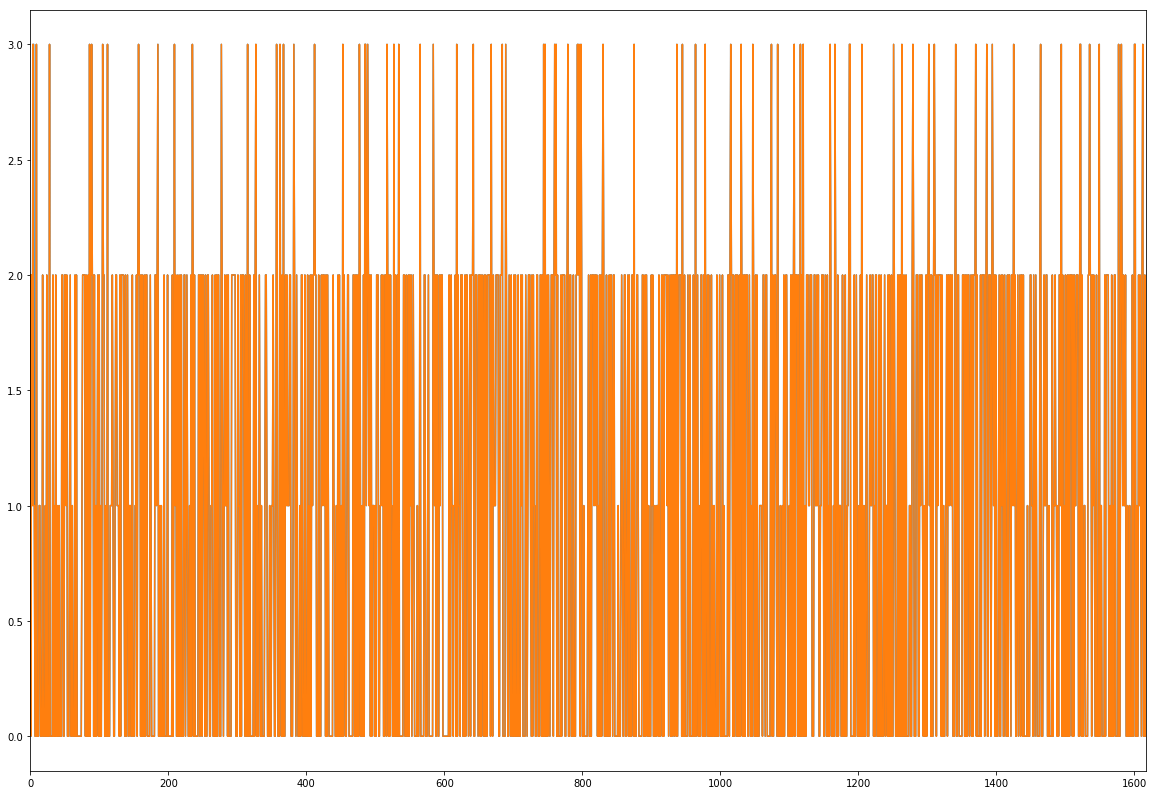

In [65]:
plt.figure(figsize=(20, 14))
y_true['Clusters'].head(y_true.shape[0]).plot(kind='line')
y_true['predicted'].head(y_true.shape[0]).plot(kind='line')